In [1]:
import pandas as pd
import numpy as np

In [2]:
# tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
# tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')

In [3]:
# tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [4]:
# tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [5]:
# df = pd.concat([tmp, tmp_2])

In [6]:
# X = df.loc[:, df.columns!='Personality (Class label)']

In [7]:
# y = df.loc[:, df.columns=='Personality (Class label)']

In [8]:
# male_df = df[df['Gender'] == 'Male']

In [9]:
# female_df = df[df['Gender'] == 'Female']

In [10]:
# # getting all the columns
# cols = set(male_df.columns)
 
# # removing the desired column
# cols.remove('Personality (Class label)')
# cols.remove('Gender')
# cols = list(cols)
# X_male = male_df[cols]
# y_male = male_df.loc[:, male_df.columns=='Personality (Class label)']

In [11]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_male, y_male,
#                                                     stratify=y_male, 
#                                                     test_size=0.30)

In [12]:
from sklearn.model_selection import train_test_split

def df_load_and_split(gender='male'):
    tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    df = pd.concat([tmp, tmp_2])
    if gender == 'male':
        df = df[df['Gender'] == 'Male']
    else:
        df = df[df['Gender'] == 'Female']
    cols = set(df.columns)
    cols.remove('Personality (Class label)')
    cols.remove('Gender')
    cols = list(cols)
    X = df[cols]
    y = df.loc[:, df.columns=='Personality (Class label)']
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        stratify=y, 
                                                        test_size=0.30)
    return (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = df_load_and_split('male')

In [13]:
print(len(X_train))
print(len(y_train))

222
222


In [14]:
y_train

,Personality (Class label)
18,serious
277,extraverted
226,serious
84,serious
214,lively
...,...
279,serious
215,dependable
186,serious
141,serious


In [15]:
tmp = X_train 
tmp['Personality (Class label)'] = list(y_train['Personality (Class label)'])

tmp_2 = X_test 
tmp_2['Personality (Class label)'] = list(y_test['Personality (Class label)'])

print(len(tmp))
print(len(tmp_2))
tmp = pd.concat([tmp, tmp_2])
tmp

222
96


,extraversion,conscientiousness,agreeableness,Age,neuroticism,openness,Personality (Class label)
18,6,1,5,23,2,4,serious
277,2,5,6,24,6,4,extraverted
226,7,7,8,19,6,1,serious
84,6,7,8,20,3,5,serious
214,2,8,4,18,7,7,lively
...,...,...,...,...,...,...,...
162,6,2,6,23,3,4,dependable
311,7,8,3,18,5,2,dependable
68,7,6,4,21,4,3,serious
279,6,6,3,20,6,4,serious


In [16]:
class_counts = tmp['Personality (Class label)'].value_counts()
min_class = class_counts.idxmin()
min_count = class_counts.min()

balanced_df = pd.concat([
    tmp[tmp['Personality (Class label)'] == min_class],
    tmp[tmp['Personality (Class label)'] != min_class].sample(min_count)
], axis=0)

balanced_df

,extraversion,conscientiousness,agreeableness,Age,neuroticism,openness,Personality (Class label)
215,6,3,6,18,6,6,dependable
219,5,7,4,21,7,6,dependable
27,4,2,6,22,8,6,dependable
108,6,7,3,18,2,7,dependable
134,4,7,4,19,7,6,dependable
27,4,2,6,22,8,6,dependable
104,4,4,6,19,5,5,dependable
263,4,2,4,22,2,6,dependable
219,5,7,4,21,7,6,dependable
162,6,2,6,23,3,4,dependable


In [17]:
# tmp = X_train 
# # tmp['Personality (Class label)'] = list(y_train['Personality (Class label)'])

# tmp_2 = X_test 
# # tmp_2['Personality (Class label)'] = list(y_test['Personality (Class label)'])

tmp_X = pd.concat([X_train, X_test])
tmp_y = pd.concat([y_train['Personality (Class label)'], y_test['Personality (Class label)']])

print(len(tmp_X))
print(len(tmp_y))

318
318


In [18]:
tmp_y

18         serious
277    extraverted
226        serious
84         serious
214         lively
          ...     
162     dependable
311     dependable
68         serious
279        serious
180         lively
Name: Personality (Class label), Length: 318, dtype: object

In [19]:
print(tmp_y.shape)
print(type(tmp_y))
tmp_y = tmp_y.to_frame()
tmp_y

(318,)
<class 'pandas.core.series.Series'>


,Personality (Class label)
18,serious
277,extraverted
226,serious
84,serious
214,lively
...,...
162,dependable
311,dependable
68,serious
279,serious


In [20]:
print(tmp_y.iloc[0])
print(tmp_y.iloc[1])

Personality (Class label)    serious
Name: 18, dtype: object
Personality (Class label)    extraverted
Name: 277, dtype: object


In [21]:
# tmp_y

In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(tmp_y).toarray())  # y_train works, need to convert temp_y to y_train
# final_df = df.join(encoder_df)
encoder_df.columns = encoder.categories_

encoder_df

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
313,1.0,0.0,0.0,0.0,0.0
314,1.0,0.0,0.0,0.0,0.0
315,0.0,0.0,0.0,0.0,1.0
316,0.0,0.0,0.0,0.0,1.0


In [23]:
tmp_y_enc = encoder_df
tmp_y_enc

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
313,1.0,0.0,0.0,0.0,0.0
314,1.0,0.0,0.0,0.0,0.0
315,0.0,0.0,0.0,0.0,1.0
316,0.0,0.0,0.0,0.0,1.0


In [24]:
# help(sm.fit_resample)
tmp_X.columns

Index(['extraversion', 'conscientiousness', 'agreeableness', 'Age',
       'neuroticism', 'openness', 'Personality (Class label)'],
      dtype='object')

In [25]:
# np.ravel(tmp_y_enc)
# tmp_X
# type(tmp_X)
tmp_X = tmp_X.drop('Personality (Class label)', axis=1)
tmp_X

,extraversion,conscientiousness,agreeableness,Age,neuroticism,openness
18,6,1,5,23,2,4
277,2,5,6,24,6,4
226,7,7,8,19,6,1
84,6,7,8,20,3,5
214,2,8,4,18,7,7
...,...,...,...,...,...,...
162,6,2,6,23,3,4
311,7,8,3,18,5,2
68,7,6,4,21,4,3
279,6,6,3,20,6,4


In [26]:
print(len(tmp_X))
print(len(tmp_y_enc)*5)

318
1590


In [27]:
# tmp = X_train 
# # tmp['Personality (Class label)'] = list(y_train['Personality (Class label)'])

# tmp_2 = X_test 
# # tmp_2['Personality (Class label)'] = list(y_test['Personality (Class label)'])

tmp_X = pd.concat([X_train, X_test])
tmp_y = pd.concat([y_train['Personality (Class label)'], y_test['Personality (Class label)']])

print(len(tmp_X))
print(len(tmp_y))

318
318


In [28]:
tmp_y = tmp_X['Personality (Class label)']
tmp_y = pd.DataFrame({'Personality (Class label)': tmp_y})
type(tmp_y)
tmp_y

,Personality (Class label)
18,serious
277,extraverted
226,serious
84,serious
214,lively
...,...
162,dependable
311,dependable
68,serious
279,serious


In [29]:
# np.array(tmp_y.values.tolist())

In [30]:
# Eita lage nai eikhane
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder on the column you want to encode
encoder.fit(tmp_y)

# Transform the column
# df['A'] = 
encoder.transform(tmp_y)[:10]

# View the resulting dataframe
# print(df)

array([[4.],
       [1.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.]])

In [31]:
encoder.inverse_transform(encoder.transform(tmp_y)[:10])

array([['serious'],
       ['extraverted'],
       ['serious'],
       ['serious'],
       ['lively'],
       ['serious'],
       ['serious'],
       ['serious'],
       ['serious'],
       ['serious']], dtype=object)

In [32]:
tmp_X = tmp_X.drop('Personality (Class label)', axis=1)

In [33]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(tmp_X, np.ravel(tmp_y))

df_res = pd.DataFrame(X_res)
df_res['Personality'] = y_res

df_res

,extraversion,conscientiousness,agreeableness,Age,neuroticism,openness,Personality
0,6,1,5,23,2,4,serious
1,2,5,6,24,6,4,extraverted
2,7,7,8,19,6,1,serious
3,6,7,8,20,3,5,serious
4,2,8,4,18,7,7,lively
...,...,...,...,...,...,...,...
1015,1,6,2,18,3,4,responsible
1016,7,2,5,21,6,6,responsible
1017,6,2,5,21,6,6,responsible
1018,3,3,4,20,5,3,responsible


In [34]:
df_res['Personality'].value_counts()

serious        204
extraverted    204
lively         204
responsible    204
dependable     204
Name: Personality, dtype: int64

In [35]:
tmp_X = df_res.drop('Personality', axis=1)
tmp_X

,extraversion,conscientiousness,agreeableness,Age,neuroticism,openness
0,6,1,5,23,2,4
1,2,5,6,24,6,4
2,7,7,8,19,6,1
3,6,7,8,20,3,5
4,2,8,4,18,7,7
...,...,...,...,...,...,...
1015,1,6,2,18,3,4
1016,7,2,5,21,6,6
1017,6,2,5,21,6,6
1018,3,3,4,20,5,3


In [36]:
tmp_y = df_res['Personality']
tmp_y = pd.DataFrame({'Personality': tmp_y})
type(tmp_y)
tmp_y

,Personality
0,serious
1,extraverted
2,serious
3,serious
4,lively
...,...
1015,responsible
1016,responsible
1017,responsible
1018,responsible


In [37]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(tmp_y).toarray())  # y_train works, need to convert temp_y to y_train
# final_df = df.join(encoder_df)
encoder_df.columns = encoder.categories_

encoder_df

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1015,0.0,0.0,0.0,1.0,0.0
1016,0.0,0.0,0.0,1.0,0.0
1017,0.0,0.0,0.0,1.0,0.0
1018,0.0,0.0,0.0,1.0,0.0


In [38]:
tmp_y_enc = encoder_df
tmp_y_enc

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1015,0.0,0.0,0.0,1.0,0.0
1016,0.0,0.0,0.0,1.0,0.0
1017,0.0,0.0,0.0,1.0,0.0
1018,0.0,0.0,0.0,1.0,0.0


In [39]:
encoder.inverse_transform(tmp_y_enc)

array([['serious'],
       ['extraverted'],
       ['serious'],
       ...,
       ['responsible'],
       ['responsible'],
       ['responsible']], dtype=object)

In [40]:
# This is for deep learning - one hot encoded y values
X_train, X_test, y_train, y_test = train_test_split(tmp_X, tmp_y_enc,
                                                        stratify=tmp_y_enc, 
                                                        test_size=0.30)

In [41]:
X_train

,extraversion,conscientiousness,agreeableness,Age,neuroticism,openness
420,4,4,5,19,5,5
265,5,6,6,21,6,7
904,3,3,4,20,6,3
87,5,6,4,19,6,4
203,6,7,5,22,4,4
...,...,...,...,...,...,...
83,5,5,5,18,2,7
229,5,6,7,19,5,6
355,5,2,5,22,2,4
764,4,5,4,20,1,6


In [42]:
y_train

,dependable,extraverted,lively,responsible,serious
420,1.0,0.0,0.0,0.0,0.0
265,0.0,0.0,0.0,0.0,1.0
904,0.0,0.0,0.0,1.0,0.0
87,0.0,0.0,0.0,0.0,1.0
203,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
83,0.0,0.0,0.0,0.0,1.0
229,0.0,0.0,0.0,0.0,1.0
355,1.0,0.0,0.0,0.0,0.0
764,0.0,0.0,1.0,0.0,0.0


In [43]:
# This is for deep learning - one hot encoded y values
X_train, X_test, y_train, y_test = train_test_split(tmp_X, tmp_y,
                                                        stratify=tmp_y, 
                                                        test_size=0.30)

In [44]:
X_train

,extraversion,conscientiousness,agreeableness,Age,neuroticism,openness
500,4,3,6,19,5,5
336,4,2,6,21,7,6
255,5,5,4,20,5,7
522,4,1,5,17,6,3
301,1,5,8,17,4,5
...,...,...,...,...,...,...
9,7,5,5,18,5,6
1004,3,3,4,20,4,3
77,5,5,4,19,4,4
245,7,5,4,23,3,3


In [45]:
y_train

,Personality
500,dependable
336,dependable
255,serious
522,extraverted
301,lively
...,...
9,serious
1004,responsible
77,serious
245,responsible


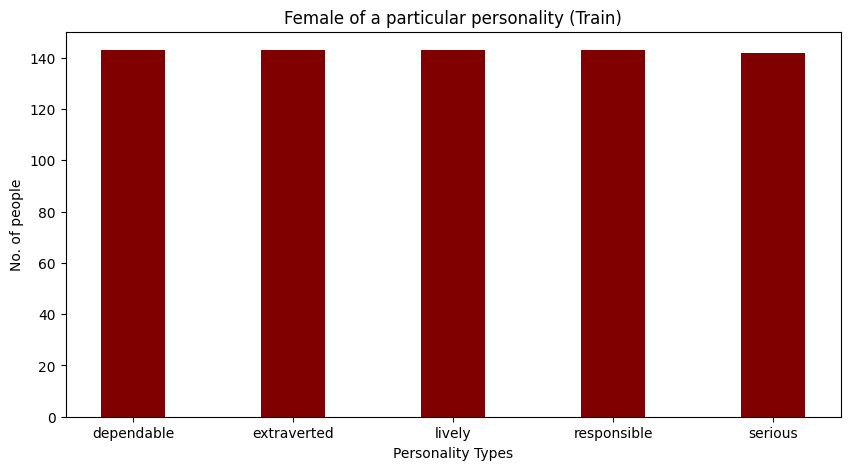

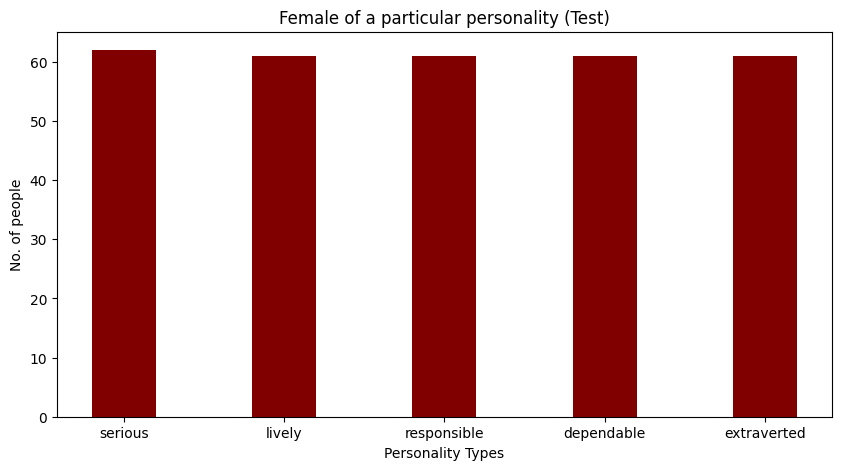

In [46]:
def draw_bars(X_train, X_test, y_train, y_test, gender='male'):
    import matplotlib.pyplot as plt
    for i in y_train, y_test:
        tmp = i.value_counts() # .count()
        fig = plt.figure(figsize = (10, 5))
        # creating the bar plot
        plt.bar(list(i['Personality'].value_counts()._get_axis(axis=0)),
                list(i['Personality'].value_counts()), color ='maroon',
                width = 0.4)

        plt.xlabel("Personality Types")
        plt.ylabel("No. of people")

        if len(i) == len(y_train):
            tmp = gender.title() + " of a particular personality (Train)"
            plt.title(tmp)
        else:
            tmp = gender.title() + " of a particular personality (Test)"
            plt.title(tmp)

        plt.show()
        
draw_bars(X_train, X_test, y_train, y_test, 'female')

In [47]:
X_train

,extraversion,conscientiousness,agreeableness,Age,neuroticism,openness
500,4,3,6,19,5,5
336,4,2,6,21,7,6
255,5,5,4,20,5,7
522,4,1,5,17,6,3
301,1,5,8,17,4,5
...,...,...,...,...,...,...
9,7,5,5,18,5,6
1004,3,3,4,20,4,3
77,5,5,4,19,4,4
245,7,5,4,23,3,3


In [48]:
y_train

,Personality
500,dependable
336,dependable
255,serious
522,extraverted
301,lively
...,...
9,serious
1004,responsible
77,serious
245,responsible


In [49]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(y_train):
    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    #perform one-hot encoding on 'team' column 
    encoder_df = pd.DataFrame(encoder.fit_transform(y_train).toarray())

    #merge one-hot encoded columns back with original DataFrame
    # final_df = df.join(encoder_df)

    #view final df
    encoder_df.columns = encoder.categories_

    return encoder_df

one_hot_encode(y_test)

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
301,1.0,0.0,0.0,0.0,0.0
302,0.0,1.0,0.0,0.0,0.0
303,0.0,0.0,0.0,0.0,1.0
304,0.0,0.0,0.0,0.0,1.0


In [50]:
def get_val(row, data):
    tmp = []
    for i in one_hot_encode(data).columns:
        tmp.append(str(i[0]))
    for i in range(len(row)):
        if row[i]==1:
            return tmp[i]
            
get_val([0, 0, 0, 1.0, 0], y_test)

'responsible'

In [51]:
y_train

,Personality
500,dependable
336,dependable
255,serious
522,extraverted
301,lively
...,...
9,serious
1004,responsible
77,serious
245,responsible


In [52]:
# y_train = one_hot_encode(y_train)

In [53]:
# y_test = one_hot_encode(y_test)

In [54]:
# # X = X_train + X_test
# X = pd.concat([X_train, X_test])
# # y = y_train + y_test
# y = pd.concat([y_train, y_test])

# X.isna().sum()

In [55]:
# y['Personality (Class label)']

In [56]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y_train)

In [57]:
# X_train   # I am now here 

In [58]:
# # X = X_train + X_test
# X = pd.concat([X_train, X_test])
# # y = y_train + y_test
# y = pd.concat([y_train, y_test])

In [59]:
print(len(X_train))
print(len(X_test))
print(len(pd.concat([X_train, X_test])))

714
306
1020


In [60]:
print(len(y_train))
print(len(y_test))
print(len(pd.concat([y_train, y_test])))

714
306
1020


In [96]:
# y_train
# y_pred
y_test

,Personality
699,lively
936,responsible
676,lively
834,lively
289,dependable
...,...
499,dependable
575,extraverted
279,serious
207,serious


Accuracy: 92.81045751633987%
MAE scores:
 [0.09803922 0.10294118 0.         0.12254902 0.10294118]
Average MAE score (across experiments):
0.08529411764705883
[[57  0  1  0  3]
 [ 0 57  2  0  2]
 [ 0  0 61  0  0]
 [ 1  0  0 60  0]
 [ 5  2  2  4 49]]


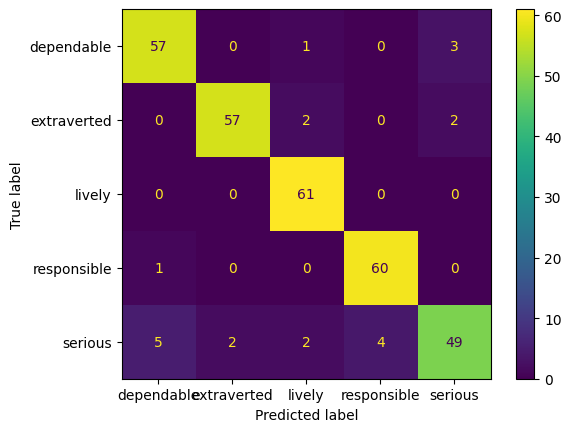

In [109]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(
    # max_features=5,
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100, '%', sep='')



# # Egula added
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, y_enc,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

# print("Mean Absolute Percentage Error: ",metrics.mean_absolute_percentage_error(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(y_test.values), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test.values, y_pred)*100, '%', sep='')


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

In [ ]:
# X_train, X_test, y_train, y_test = df_load_and_split('male')

Accuracy: 68.62745098039215%
MAE scores:
 [0.80882353 0.75       0.96078431 0.79901961 0.75490196]
Average MAE score (across experiments):
0.8147058823529412
[[35 10  1  4 11]
 [ 0 53  0  2  6]
 [ 0  7 49  5  0]
 [11  9  2 38  1]
 [14  5  3  5 35]]


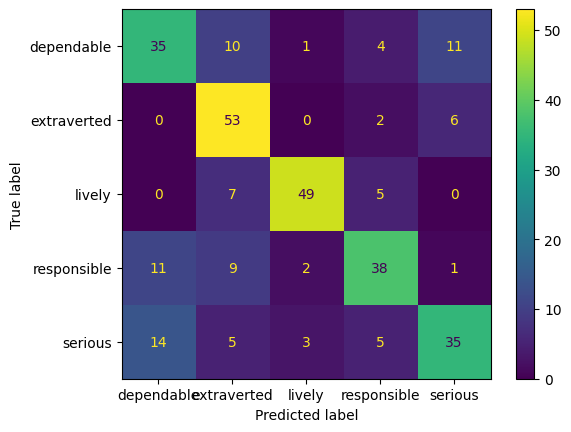

In [110]:
from sklearn import svm
clf = svm.SVC(
 C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

# # Egula added
from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Accuracy: 83.66013071895425%
[[58  0  0  0  3]
 [ 2 57  2  0  0]
 [ 0  2 59  0  0]
 [ 5  0  0 55  1]
 [16  7  5  7 27]]


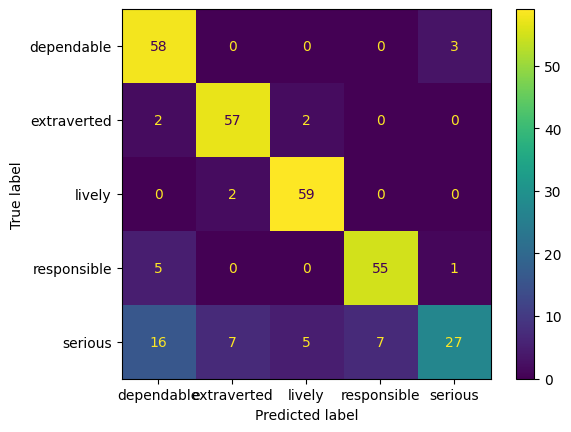

In [111]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

clf = KNeighborsClassifier(leaf_size=5, p=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Accuracy: 96.73202614379085%
MAE scores:
 [0.1372549  0.14705882 0.11764706 0.08333333 0.11764706]
Average MAE score (across experiments):
0.12058823529411763
[[61  0  0  0  0]
 [ 0 60  0  1  0]
 [ 0  0 61  0  0]
 [ 1  0  0 57  3]
 [ 1  2  0  2 57]]


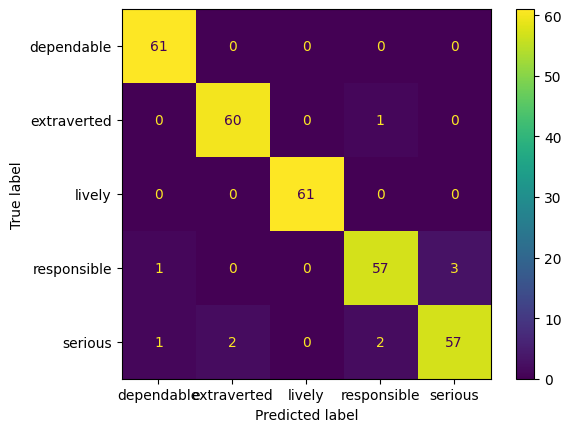

In [112]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', 
                    solver='adam', alpha=0.00001, batch_size='auto', 
                    learning_rate='constant', learning_rate_init=0.001, 
                    power_t=0.5, max_iter=20000, shuffle=True, random_state=42, 
                    tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                    nesterovs_momentum=True, early_stopping=False, 
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                    epsilon=1e-08, n_iter_no_change=100, max_fun=15000)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')



# # Egula added
from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Accuracy: 93.79084967320262%
MAE scores:
 [0.09803922 0.10294118 0.04901961 0.08823529 0.22058824]
Average MAE score (across experiments):
0.11176470588235295
[[61  0  0  0  0]
 [ 0 61  0  0  0]
 [ 0  0 61  0  0]
 [ 1  0  0 60  0]
 [ 8  2  2  6 44]]


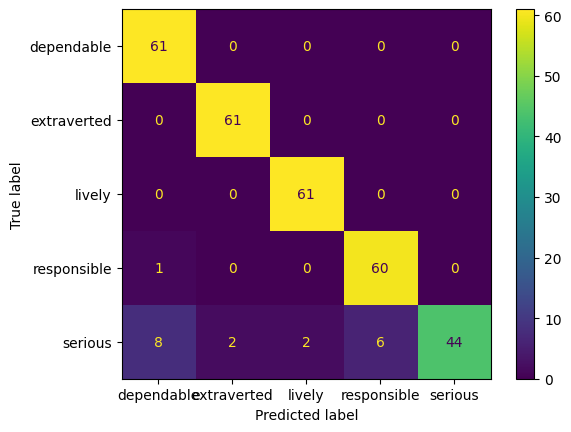

In [113]:
from sklearn.gaussian_process import GaussianProcessClassifier

clf = GaussianProcessClassifier(kernel=None, optimizer='fmin_l_bfgs_b', 
                                n_restarts_optimizer=0, max_iter_predict=100, 
                                warm_start=False, copy_X_train=True, 
                                random_state=42, multi_class='one_vs_rest', 
                                n_jobs=None)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')



# # Egula added
from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Accuracy: 86.60130718954248%
MAE scores:
 [0.23529412 0.25980392 0.23529412 0.29411765 0.2745098 ]
Average MAE score (across experiments):
0.2598039215686275
[[55  0  0  0  6]
 [ 0 61  0  0  0]
 [ 0  3 57  1  0]
 [ 1  6  0 51  3]
 [ 6  7  6  2 41]]


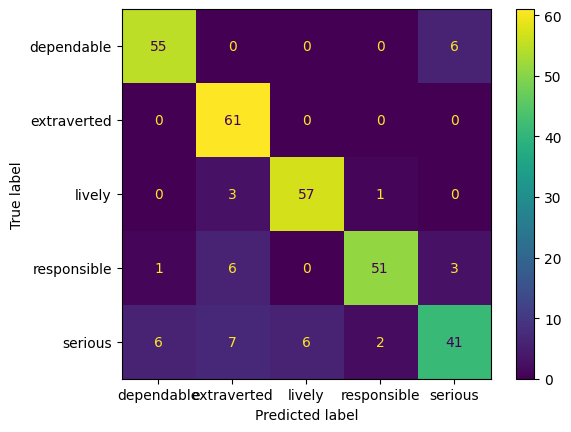

In [114]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, min_samples_split=30, random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Accuracy: 49.01960784313725%
MAE scores:
 [0.91176471 1.11764706 1.09313725 1.06372549 1.00980392]
Average MAE score (across experiments):
1.0392156862745097
[[10 24  0  0 27]
 [ 0 53  0  0  8]
 [ 0  6 45  0 10]
 [ 0  9 30  0 22]
 [ 1 16  3  0 42]]


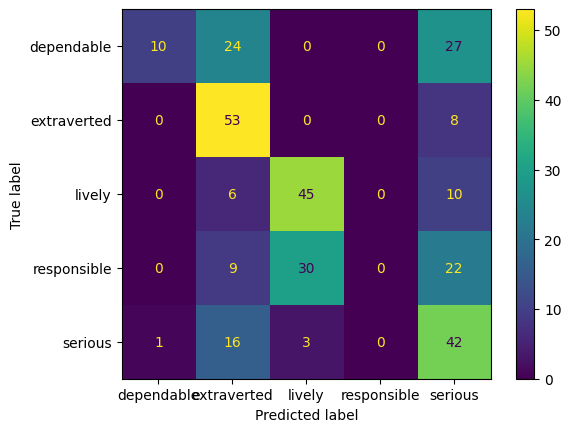

In [115]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(learning_rate=0.01, random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Accuracy: 66.01307189542483%
MAE scores:
 [0.76960784 0.87254902 0.93627451 0.81862745 0.81862745]
Average MAE score (across experiments):
0.8431372549019607
[[32  8  1  4 16]
 [ 1 51  3  0  6]
 [ 0  3 53  5  0]
 [13  7  7 31  3]
 [13  5  5  4 35]]


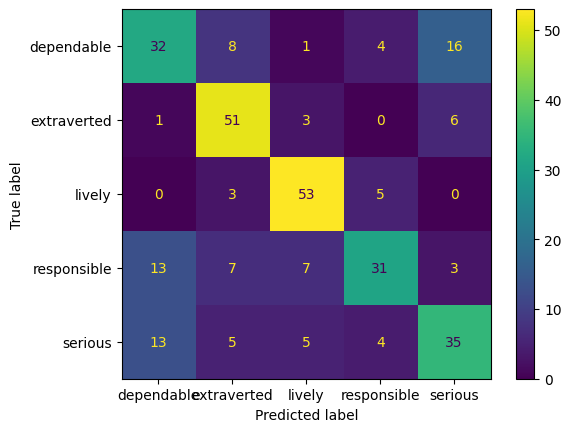

In [116]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Accuracy: 59.47712418300654%
MAE scores:
 [0.81862745 0.91666667 0.92647059 0.87254902 0.8627451 ]
Average MAE score (across experiments):
0.8794117647058824
[[ 8 14  0 15 24]
 [ 0 49  0  6  6]
 [ 0  4 52  5  0]
 [ 1  9  7 33 11]
 [ 1  3  9  9 40]]


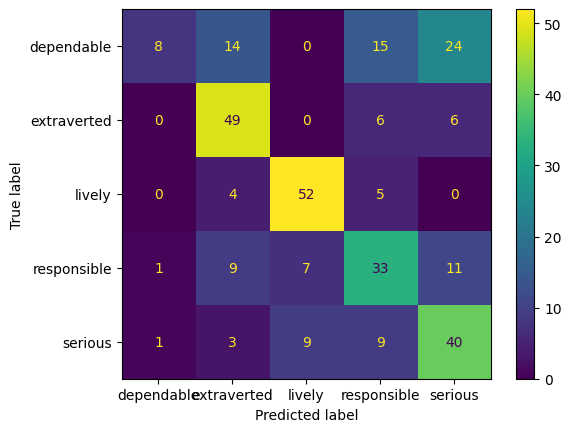

In [117]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=60, tol=0.1, max_iter=1000000, random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

In [ ]:
# from sklearn.svm import NuSVC

# clf = NuSVC(random_state=42)

# clf = clf.fit(X_train,np.ravel(y_train))

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

# print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

Accuracy: 96.07843137254902%
MAE scores:
 [0.05882353 0.14705882 0.00980392 0.06862745 0.17156863]
Average MAE score (across experiments):
0.09117647058823529
[[59  0  0  0  2]
 [ 0 61  0  0  0]
 [ 0  0 61  0  0]
 [ 1  0  0 60  0]
 [ 5  2  2  0 53]]


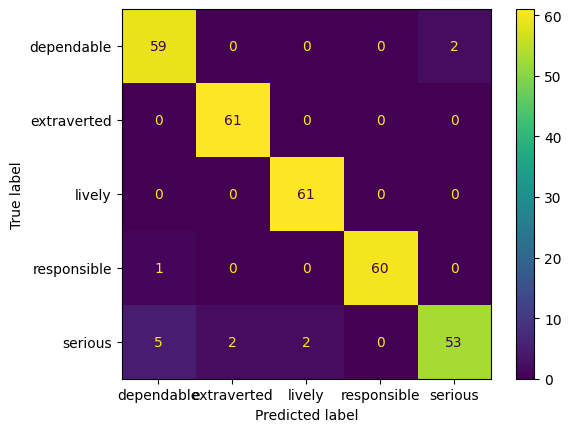

In [118]:
from sklearn import svm
clf = svm.SVC(
 C=100000.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
    shrinking=True, probability=False, tol=0.001, cache_size=200, 
    random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Accuracy: 81.04575163398692%
MAE scores:
 [0.50490196 0.46568627 0.48529412 0.51960784 0.46568627]
Average MAE score (across experiments):
0.4882352941176471
[[53  0  1  0  7]
 [ 5 49  0  1  6]
 [ 0  7 50  4  0]
 [ 2  5  0 50  4]
 [ 8  2  4  2 46]]


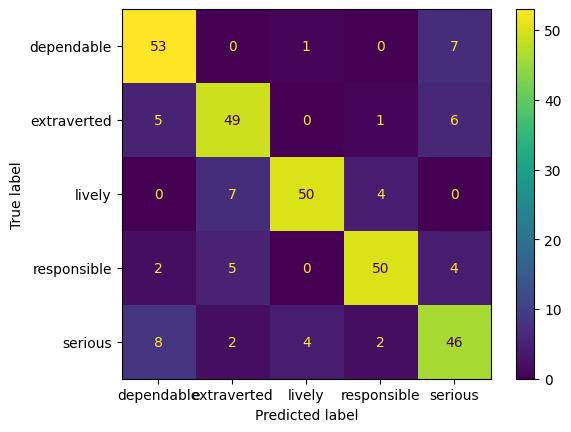

In [119]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Accuracy: 61.111111111111114%
MAE scores:
 [0.84313725 0.90686275 1.08333333 0.8627451  0.98039216]
Average MAE score (across experiments):
0.9352941176470587
[[23  7  1 10 20]
 [ 3 44  0  8  6]
 [ 1  5 50  5  0]
 [15  7  7 31  1]
 [ 6  2  7  8 39]]


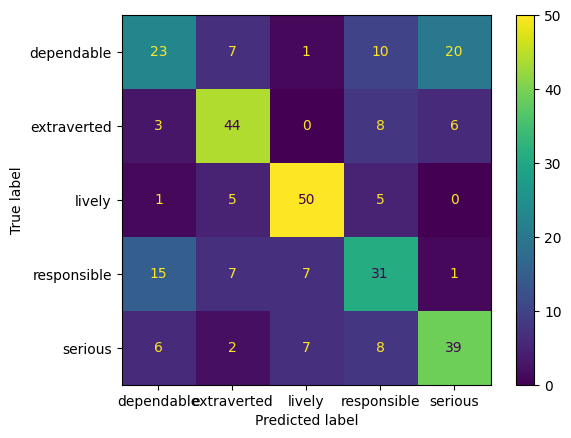

In [120]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Accuracy: 96.73202614379085%
MAE scores:
 [0.08823529 0.1372549  0.05882353 0.06862745 0.13235294]
Average MAE score (across experiments):
0.09705882352941178
[[61  0  0  0  0]
 [ 0 59  0  0  2]
 [ 0  0 61  0  0]
 [ 1  0  0 60  0]
 [ 5  0  2  0 55]]


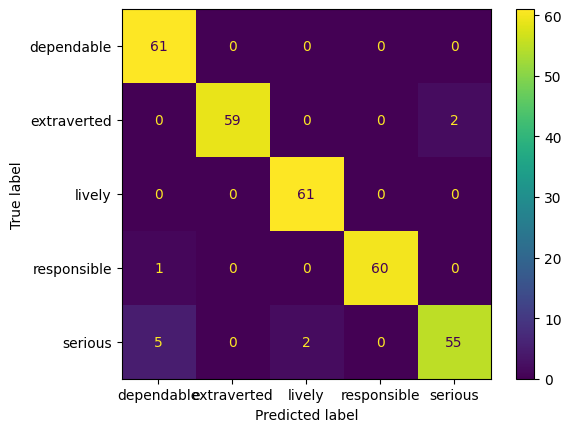

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, 
                                 n_estimators=100, subsample=1.0, 
                                 criterion='friedman_mse', 
                                 min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_depth=3, 
                                 min_impurity_decrease=0.0, init=None, 
                                 random_state=42, max_features=None, 
                                 verbose=0, max_leaf_nodes=None, 
                                 warm_start=False, validation_fraction=0.1, 
                                 n_iter_no_change=None, tol=0.0001, 
                                 ccp_alpha=0.0)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Accuracy: 93.4640522875817%
MAE scores:
 [0.10294118 0.09313725 0.00980392 0.1127451  0.10294118]
Average MAE score (across experiments):
0.08431372549019607
[[57  0  1  0  3]
 [ 0 59  2  0  0]
 [ 0  0 61  0  0]
 [ 1  0  0 60  0]
 [ 5  2  4  2 49]]


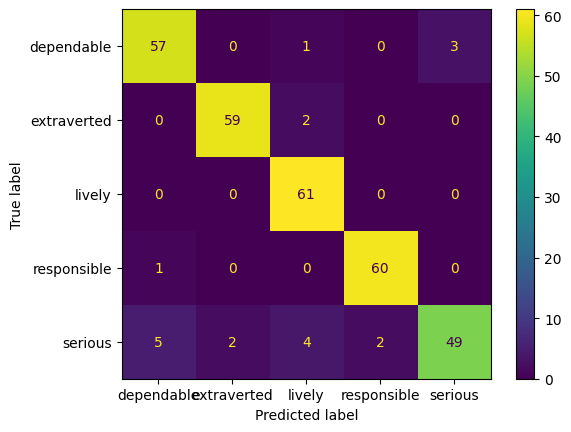

In [122]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(
    # max_features=5,
    criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
    random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, 
    class_weight=None, ccp_alpha=0.0
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

In [131]:
from xgboost import XGBRegressor

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBRegressor()
clf.fit(X_train, tmp)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Mean Absolute Percentage Error: ",metrics.mean_absolute_percentage_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(tmp_2, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
# y_test_array = y_test["Personality"].values

# # Get the unique class names from y_test_array and y_pred
# class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
# class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Mean Absolute Percentage Error: 7104773523999255.0%
Mean Absolute Error: 2.402752000484472%
MAE scores:
 [0.13649872 0.08019614 0.08797354 0.12694066 0.11932461]
Average MAE score (across experiments):
0.11018673121779654


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [125]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier()
clf.fit(X_train, tmp)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Accuracy: 98.56209150326798%
MAE scores:
 [0.06372549 0.11764706 0.         0.03921569 0.09313725]
Average MAE score (across experiments):
0.06274509803921569


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [126]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(n_estimators=500)
clf.fit(X_train, tmp)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Accuracy: 98.36601307189542%
MAE scores:
 [0.08333333 0.07843137 0.         0.03921569 0.13235294]
Average MAE score (across experiments):
0.06666666666666667


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [127]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(n_estimators=500, 
                    # early_stopping_rounds=5
                   )
clf.fit(X_train, tmp, 
        early_stopping_rounds=5, 
             eval_set=[(X_test, tmp_2)],
             verbose=False)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 98.4967320261438%
MAE scores:
 [0.08333333 0.07843137 0.         0.03921569 0.13235294]
Average MAE score (across experiments):
0.06666666666666667


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [129]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(
                    n_estimators=1000, learning_rate=0.05
                    # n_estimators=500, 
                    # early_stopping_rounds=5
                   )
clf.fit(X_train, tmp, 
        early_stopping_rounds=5, 
             eval_set=[(X_test, tmp_2)],
             verbose=False)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 98.36601307189542%
MAE scores:
 [0.06372549 0.08823529 0.         0.03921569 0.13235294]
Average MAE score (across experiments):
0.06470588235294118


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [130]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(
                    n_estimators=1000, learning_rate=0.05, n_jobs=4
                    # n_estimators=500, 
                    # early_stopping_rounds=5
                   )
clf.fit(X_train, tmp, 
        early_stopping_rounds=5, 
             eval_set=[(X_test, tmp_2)],
             verbose=False)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test_array = y_test["Personality"].values

# Get the unique class names from y_test_array and y_pred
class_names = np.unique(np.concatenate((y_test_array, y_pred)))

# Convert class_names to a list of strings
class_names = class_names.tolist()

# Assuming `clf` is your fitted classifier
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 98.36601307189542%
MAE scores:
 [0.06372549 0.08823529 0.         0.03921569 0.13235294]
Average MAE score (across experiments):
0.06470588235294118


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [90]:
for i in range(5):
    print('Expected: ', list(tmp_2.iloc[i]))
    print('Predicted: ', y_pred[i])

Expected:  [0.0, 0.0, 1.0, 0.0, 0.0]
Predicted:  [0. 0. 1. 0. 0.]
Expected:  [0.0, 0.0, 0.0, 1.0, 0.0]
Predicted:  [0. 0. 0. 1. 0.]
Expected:  [0.0, 0.0, 1.0, 0.0, 0.0]
Predicted:  [0. 0. 1. 0. 0.]
Expected:  [0.0, 0.0, 1.0, 0.0, 0.0]
Predicted:  [0. 0. 1. 0. 0.]
Expected:  [1.0, 0.0, 0.0, 0.0, 0.0]
Predicted:  [1. 0. 0. 0. 0.]


In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

# Build the model
model = Sequential()
model.add(Dense(1000, input_dim=6, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, tmp, epochs=100, batch_size=8, validation_data=(X_test, tmp_2))

2023-04-29 16:07:04.410485: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 16:07:31.381368: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-29 16:07:31.382151: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-29 16:07:31.382206: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Epoch 1/100
90/90 [==============================] - 4s 18ms/step - loss: 1.4426 - accuracy: 0.3796 - val_loss: 1.2941 - val_accuracy: 0.4575
Epoch 2/100
90/90 [==============================] - 1s 14ms/step - loss: 1.1565 - accuracy: 0.5042 - val_loss: 1.1960 - val_accuracy: 0.5621
Epoch 3/100
90/90 [==============================] - 1s 14ms/step - loss: 1.1409 - accuracy: 0.4986 - val_loss: 1.0623 - val_accuracy: 0.6209
Epoch 4/100
90/90 [==============================] - 1s 15ms/step - loss: 1.1235 - accuracy: 0.5308 - val_loss: 0.9808 - val_accuracy: 0.6536
Epoch 5/100
90/90 [==============================] - 1s 15ms/step - loss: 0.9527 - accuracy: 0.5798 - val_loss: 1.0997 - val_accuracy: 0.5850
Epoch 6/100
90/90 [==============================] - 1s 14ms/step - loss: 0.8660 - accuracy: 0.6583 - val_loss: 0.7581 - val_accuracy: 0.7222
Epoch 7/100
90/90 [==============================] - 1s 14ms/step - loss: 0.7145 - accuracy: 0.6989 - val_loss: 0.8171 - val_accuracy: 0.6405
Epoch 

In [ ]:
2

In [ ]:
print(X_train.columns)
print(X_train.shape)
print(type(X_train))
print(y_train.columns)
print(y_train.shape)
print(type(y_train))
print(y_train['Personality (Class label)'].unique())

In [ ]:
X_train.columns  # Input

In [ ]:
set(y_train['Personality (Class label)'])   # Output

In [ ]:
# Define unique colors for each column in X_train
colors = {'conscientiousness': 'blue',
          'agreeableness': 'red',
          'neuroticism': 'green',
          'extraversion': 'purple',
          'openness': 'orange',
          'Age': 'black'}

# Define unique markers for each class label in y_train
markers = {'lively': 'o',
           'serious': 's',
           'dependable': 'D',
           'extraverted': '^',
           'responsible': 'p'}


y_color = {'lively': 'purple',
           'serious': 'red',
           'dependable': 'blue',
           'extraverted': 'green',
           'responsible': 'violet'}

y_marker = {'lively': 'o',
           'serious': 'x',
           'dependable': 's',
           'extraverted': '^',
           'responsible': 'D'}

In [ ]:
y_marker.values()

In [ ]:
import matplotlib.pyplot as plt


# # Define marker and color mapping for each class label
class_mapping = {class_label: {'marker': y_marker[class_label], 'color': y_color[class_label]} for class_label in y_color.keys()}

# Create plot
fig, ax = plt.subplots()

X_train.reset_index(drop=True, inplace=True)

c = 0

# Age vs Trait X Target as symbol

# Iterate over each row in X_train
for index, row in X_train.iterrows():
    # print()
    # print('index: ', str(index))
    # print('row: ', str(row))
    # print('age: ', str(row['Age']))  # 
    # print('agreeableness: ', str(row['agreeableness']))  # 

    # Get corresponding class label for current row
    class_label = y_train.iloc[index]['Personality (Class label)']
    # print('class: ',class_label)
    
    # Get corresponding color for each column in current row
    row_colors = [colors[col] for col in X_train.columns]
    
    # Get corresponding marker for current class label
    marker = markers[class_label]
    
    # Plot current row
    # ax.scatter(row, [index]*len(row), c=row_colors, marker=marker)
    
    ax.scatter(row['Age'], row['agreeableness'], c=y_color[class_label], 
               marker=y_marker[class_label])

    c = c + 10
    if c == 5:
        break

# Create a legend for the markers and colors
for class_label, class_info in class_mapping.items():
    ax.scatter([], [], c=class_info['color'], marker=class_info['marker'], 
               label=class_label)

# Set x-axis label
ax.set_xlabel('Age')

# Set y-axis label
ax.set_ylabel('Agreeableness')

# Set plot title
ax.set_title('Agreeableness Vs Age Vs Personality Class')

# Show the legend
ax.legend(title='Personality Class', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(class_mapping))

# Show the plot
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# # Define marker and color mapping for each class label
# class_mapping = {class_label: {'marker': y_marker[class_label], 'color': y_color[class_label]} for class_label in y_color.keys()}


# # Create plot
# fig, ax = plt.subplots()

# # Iterate over each row in X_train
# for index, row in X_train.iterrows():
    
#     # Get corresponding class label for current row
#     class_label = y_train.iloc[index]['Personality (Class label)']
    
#     # Get corresponding color and marker for current class label
#     class_marker = class_mapping[class_label]['marker']
#     class_color = class_mapping[class_label]['color']
    
#     ax.scatter(row['Age'], row['agreeableness'], c=class_color, 
#                marker=class_marker,
#               alpha=0.5)

# # Create a legend for the markers and colors
# for class_label, class_info in class_mapping.items():
#     ax.scatter([], [], c=class_info['color'], marker=class_info['marker'], 
#                label=class_label,
#               )

# # Set x-axis label
# ax.set_xlabel('Feature value')

# # Set y-axis label
# ax.set_ylabel('Data point')

# # Set plot title
# ax.set_title('Scatter plot of X_train')

# # Show the legend
# ax.legend()

# # Show the plot
# plt.show()

In [ ]:
def plot_graph(class_, X_train, y_train):
    import matplotlib.pyplot as plt

    # Create plot
    fig, ax = plt.subplots()

    X_train.reset_index(drop=True, inplace=True)

    # c = 0

    # Age vs Trait X Target as symbol

    # Iterate over each row in X_train
    for index, row in X_train.iterrows():
        # print()
        # print('index: ', str(index))
        # print('row: ', str(row))
        # print('age: ', str(row['Age']))  # 
        # print('agreeableness: ', str(row['agreeableness']))  # 

        # Get corresponding class label for current row
        class_label = y_train.iloc[index]['Personality (Class label)']
        # print('class: ',class_label)

        # Get corresponding color for each column in current row
        row_colors = [colors[col] for col in X_train.columns]

        # Get corresponding marker for current class label
        marker = markers[class_label]

        # Plot current row
        # ax.scatter(row, [index]*len(row), c=row_colors, marker=marker)

        ax.scatter(row['Age'], row[class_], c=y_color[class_label], 
                   marker=y_marker[class_label])

        # c = c + 10
        # if c == 5:
        #     break

    # Create a legend for the markers and colors
    for class_label, class_info in class_mapping.items():
        ax.scatter([], [], c=class_info['color'], marker=class_info['marker'], 
                   label=class_label)

    # Set x-axis label
    ax.set_xlabel('Age')

    # Set y-axis label
    ax.set_ylabel(class_.title())

    # Set plot title
    tmp = class_.title()
    tmp =  tmp + ' Vs Age Vs Personality Class'
    ax.set_title(tmp)

    # Show the legend
    ax.legend(title='Personality Class', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(class_mapping))

    # Show the plot
    plt.show()
    
plot_graph('agreeableness', X_train, y_train)

In [ ]:
for i in set(X_train.columns):   # Output
    plot_graph(i, X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [ ]:
X_train.head()

In [ ]:
# Create cluster feature
kmeans = KMeans(n_clusters=len(set(y_train['Personality (Class label)'])))
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

In [ ]:
list(X['Cluster'])[:10]

In [ ]:
list(y_train['Personality (Class label)'])[:10]

In [ ]:
# Create cluster feature
kmeans = KMeans(n_clusters=len(set(y_train['Personality (Class label)'])))
X_train["Cluster"] = kmeans.fit_predict(X_train[['agreeableness', 	
                                           'openness', 	
                                           'extraversion', 	
                                           'conscientiousness', 	
                                           'Age', 	
                                           'neuroticism']])
X_train["Cluster"] = X_train["Cluster"].astype("category")

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder on the column you want to encode
encoder.fit(y_train[['Personality (Class label)']])

# Transform the column
# df['A'] = 
encoder.transform(y_train[['Personality (Class label)']])[:10]

# View the resulting dataframe
# print(df)

In [ ]:
for i in range(10):
    print(encoder.transform(y_train[['Personality (Class label)']])[i])

In [ ]:
tmp = encoder.transform(y_train[['Personality (Class label)']])
len(tmp)

tmp_2 = list(X_train["Cluster"])
len(tmp_2)

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# print("Accuracy: ",metrics.accuracy_score(
#     np.ravel(encoder.transform(y_train[['Personality (Class label)']])), 
#     np.ravel(list(X_train["Cluster"])))*100, '%', sep='')


print("Accuracy: ",metrics.accuracy_score(
    np.ravel(tmp), 
    np.ravel(tmp_2))*100, '%', sep='')


# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# from sklearn.model_selection import cross_val_score

# # Multiply by -1 since sklearn calculates *negative* MAE
# scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
#                               cv=5,
#                               scoring='neg_mean_absolute_error')

# print("MAE scores:\n", scores)

# print("Average MAE score (across experiments):")
# print(scores.mean())

In [ ]:
# Create cluster feature
kmeans = KMeans(n_clusters=len(set(y_test['Personality (Class label)'])))
X_test["Cluster"] = kmeans.fit_predict(X_test[['agreeableness', 	
                                           'openness', 	
                                           'extraversion', 	
                                           'conscientiousness', 	
                                           'Age', 	
                                           'neuroticism']])
X_test["Cluster"] = X_test["Cluster"].astype("category")

tmp = encoder.transform(y_test[['Personality (Class label)']])
len(tmp)

tmp_2 = list(X_test["Cluster"])
len(tmp_2)

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# print("Accuracy: ",metrics.accuracy_score(
#     np.ravel(encoder.transform(y_train[['Personality (Class label)']])), 
#     np.ravel(list(X_train["Cluster"])))*100, '%', sep='')


print("Accuracy: ",metrics.accuracy_score(
    np.ravel(tmp), 
    np.ravel(tmp_2))*100, '%', sep='')

In [ ]:
X_train

In [ ]:
for i in range(50):
    print(str(tmp[i]), " : ", str(tmp_2[i]))

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the categorical feature
# Perform PCA on the numerical data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Visualize the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
X_train

In [ ]:
# import matplotlib.pyplot as plt

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()

In [ ]:
# y_train

In [ ]:
# # Scale the data
# X_train_scaled = X_train / np.max(X_train)
# X_test_scaled = X_test / np.max(X_test)

# from sklearn.preprocessing import scale

# X_train_scaled = scale(X_train)
# X_test_scaled = scale(X_test)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_test_scaled

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(y_train):
    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    #perform one-hot encoding on 'team' column 
    encoder_df = pd.DataFrame(encoder.fit_transform(y_train).toarray())

    #merge one-hot encoded columns back with original DataFrame
    # final_df = df.join(encoder_df)

    #view final df
    encoder_df.columns = encoder.categories_

    return encoder_df

y_train_ohe = one_hot_encode(y_train)
y_test_ohe = one_hot_encode(y_test)

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(X_train_scaled.shape[1],), 
                       activation='relu'),
    keras.layers.Dense(y_train_ohe.shape[1], 
                       activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train_ohe, epochs=10, batch_size=32)

In [ ]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_ohe)
print('Test accuracy:', test_acc)

In [ ]:
predictions = model.predict(X_test_scaled)

In [ ]:
np.argmax(predictions, axis=1)

In [ ]:
model.predict(X_train_scaled)

In [ ]:
np.argmax(model.predict(X_train_scaled), axis=1)